In [0]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj1.jpg


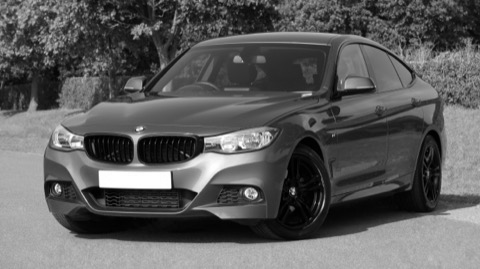

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj2.jpg


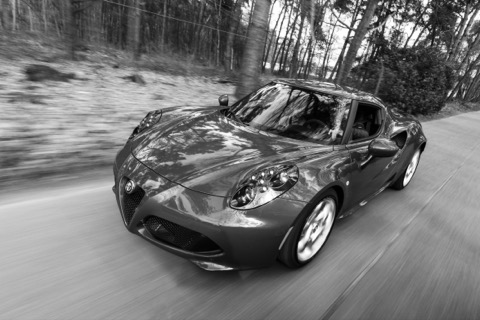

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj3.jpg


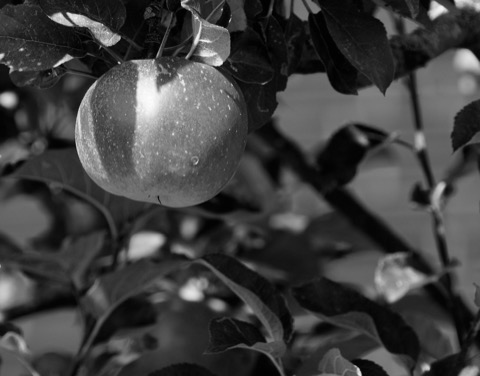

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj4.jpg


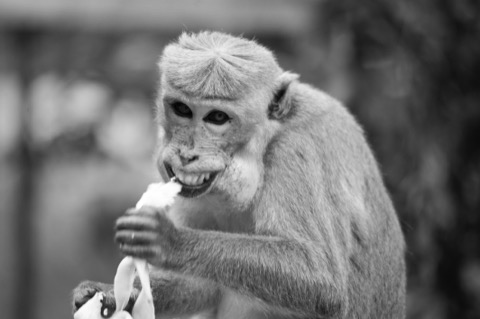

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj5.jpg


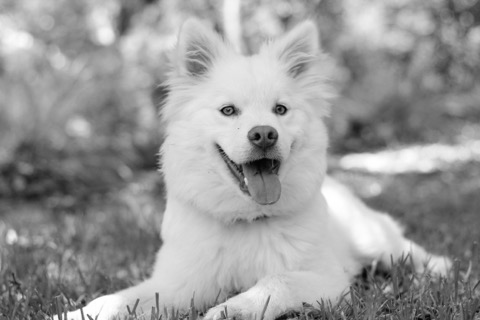

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj6.jpg


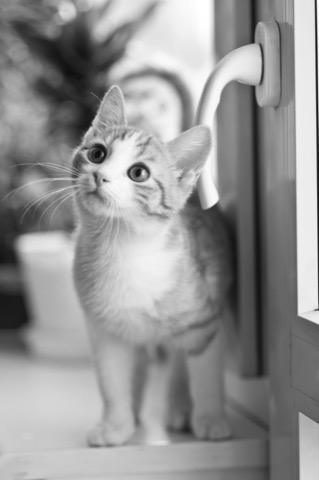

In [2]:
urls = [f"https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/object/obj{i+1}.jpg" for i in range(6)]
# url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/text/text1.jpg"
images, images_gray = [], []

for url in urls:
  img = url_to_image(url)
  images.append(img)
  grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  images_gray.append(grayscaled)
  cv2_imshow(grayscaled)

# IMAGE 1

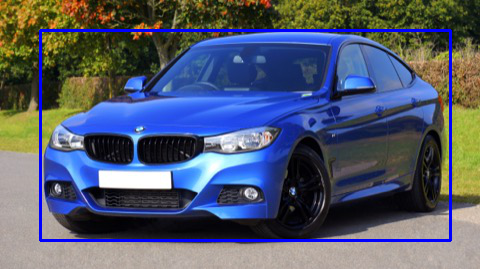

In [0]:
img = images[0].copy()

cv2.rectangle(img, (40,30), (450,240), (255, 0, 0), 2)
cv2_imshow(img)

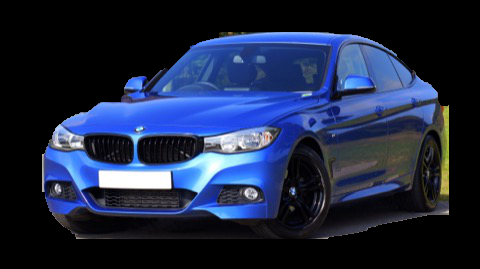

In [0]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (40,30,450,240)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

# IMAGE 2 

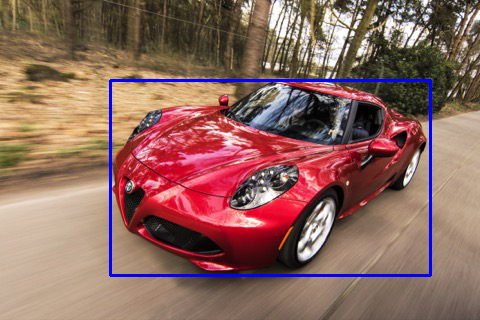

In [68]:
img = images[1].copy()

cv2.rectangle(img, (110, 80), (430, 275), (255, 0, 0), 2)
cv2_imshow(img)

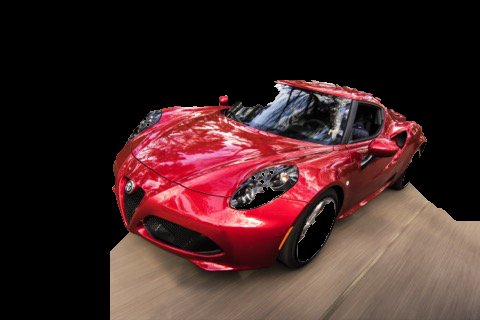

In [4]:
img = images[1].copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (110, 80, 430, 275)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

## Try use active_contour

In [0]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


In [84]:
#110, 80, 430, 275
s = np.linspace(0, 2*np.pi, 400)
x = (430 + 110) // 2 + 170*np.cos(s)
y = (275 + 80) // 2 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


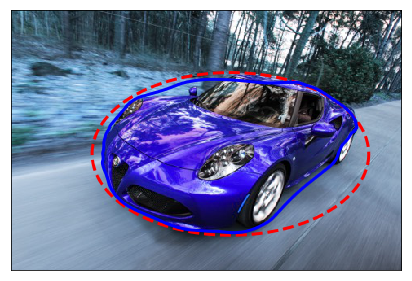

In [85]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

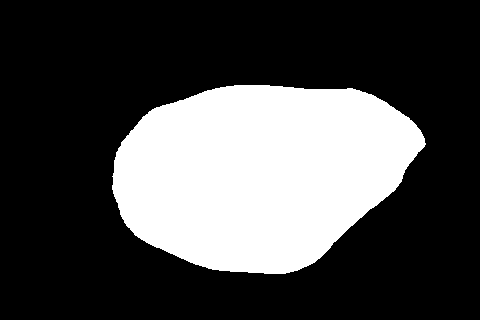

In [86]:
mask = np.zeros(img.shape) # create a single channel 200x200 pixel black image 
cv2.fillPoly(mask, pts=np.int32([snake]), color=(255,255,255))
cv2_imshow(mask)

In [87]:
img.shape, mask.shape

((320, 480, 3), (320, 480, 3))

In [0]:
img = images[1].copy()
# mask = np.zeros(img.shape[:2], dtype=np.uint8)

res = cv2.bitwise_and(img, img, mask = mask[:, :, 0].astype(np.uint8))

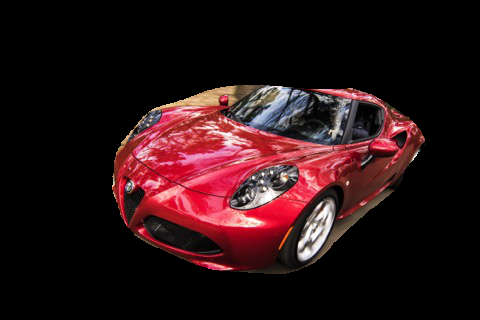

In [89]:
cv2_imshow(res)

In [0]:
# imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(imgray, 127, 255, 0)
# im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours, 0, (0,255,0), 3)
# cv2_imshow(im2)

In [0]:
# ctr = np.array(snake).reshape((-1,1,2)).astype(np.int32)
# cv2.drawContours(img, [ctr], -1, (0,255,0), 3)
# cv2_imshow(img)

In [0]:
# snake

# cv2.drawContours(img, snake, -1, (0,255,0), 3)
# cv2.drawContours(img, snake, 3, (0,255,0), 3)
# cv2.drawContours(img, snake, 0, (0,255,0), 3)


# IMAGE 3

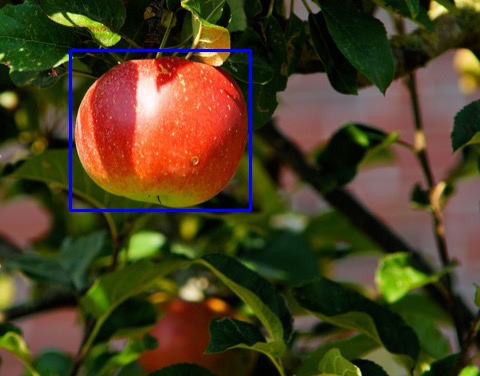

In [0]:
img = images[2].copy()

cv2.rectangle(img, (70, 50), (250, 210), (255, 0, 0), 2)
cv2_imshow(img)

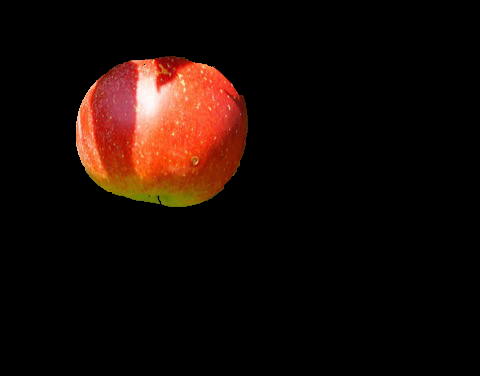

In [0]:
img = images[2].copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (70, 50, 250, 210)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

# IMAGE 4

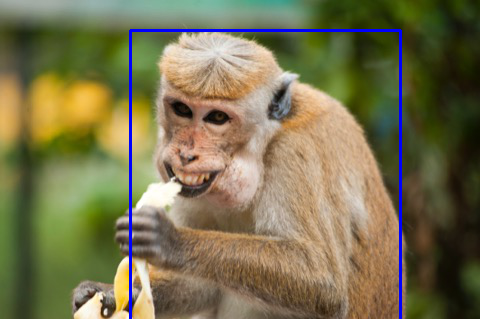

In [99]:
img = images[3].copy()

cv2.rectangle(img, (130, 30), (400, 500), (255, 0, 0), 2)
cv2_imshow(img)

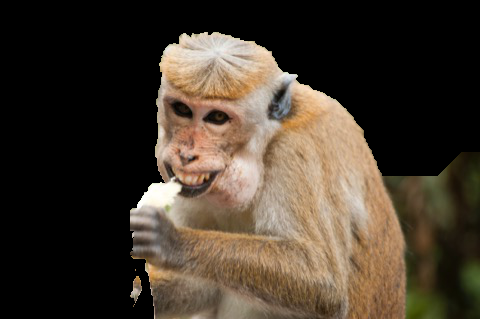

In [0]:
img = images[3].copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (130, 30, 400, 500)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

In [106]:
# 130, 30, 400, 500
s = np.linspace(0, 2*np.pi, 400)
x = (130 + 400) // 2 + 200*np.cos(s)
y = (30 + 500) // 2 + 240*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


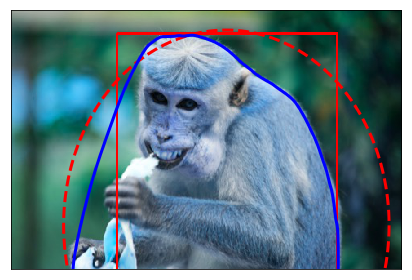

In [107]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

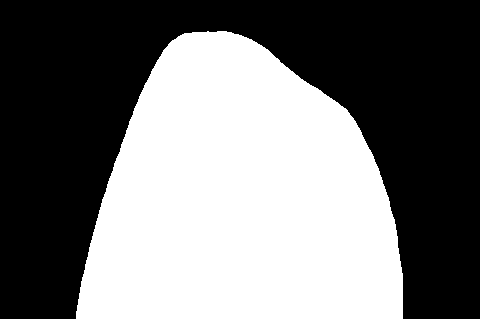

In [108]:
mask = np.zeros(img.shape) # create a single channel 200x200 pixel black image 
cv2.fillPoly(mask, pts=np.int32([snake]), color=(255,255,255))
cv2_imshow(mask)

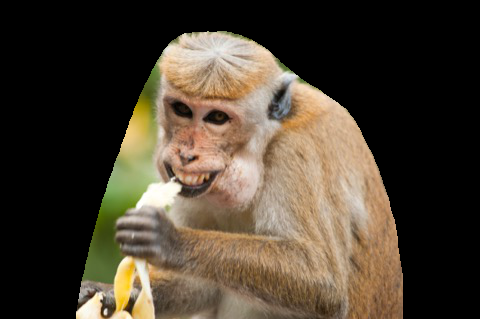

In [109]:
img = images[3].copy()
# mask = np.zeros(img.shape[:2], dtype=np.uint8)

res = cv2.bitwise_and(img, img, mask = mask[:, :, 0].astype(np.uint8))
cv2_imshow(res)

# IMAGE 5

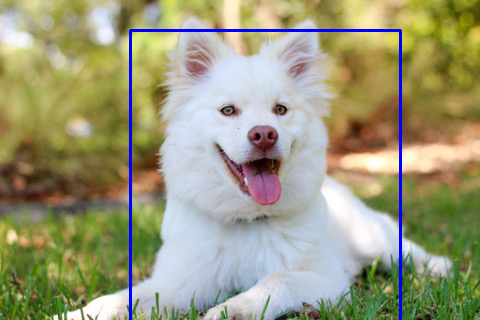

In [0]:
img = images[4].copy()

cv2.rectangle(img, (130, 30), (400, 500), (255, 0, 0), 2)
cv2_imshow(img)

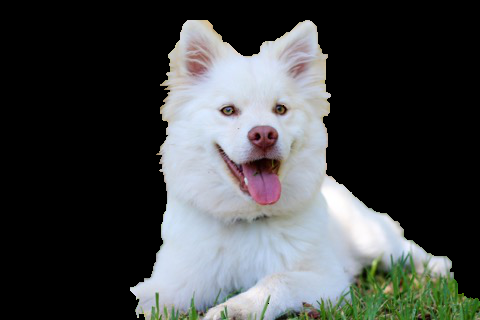

In [0]:
img = images[4].copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (130, 20, 400, 500)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

# IMAGE 6

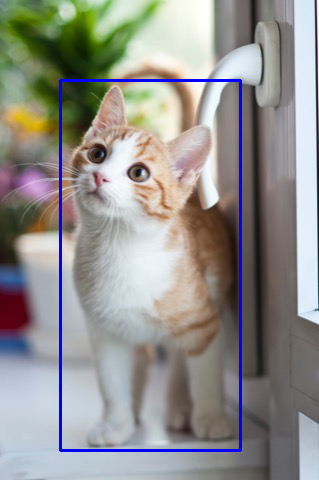

In [90]:
img = images[5].copy()

cv2.rectangle(img, (60, 80), (240, 450), (255, 0, 0), 2)
cv2_imshow(img)

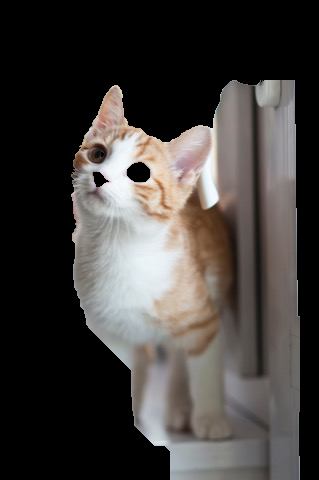

In [0]:
img = images[5].copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)

fgdModel = np.zeros((1,65),np.float64)

rect = (60, 80, 240, 450)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
cv2_imshow(img1)

In [95]:
#60, 80, 240, 450
s = np.linspace(0, 2*np.pi, 400)
x = (60 + 240) // 2 + 100*np.cos(s)
y = (450 + 80) // 2 + 220*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


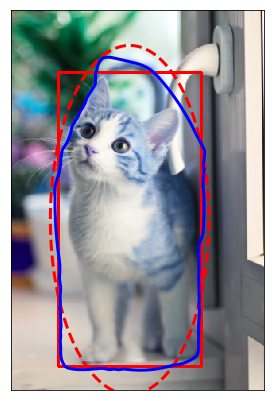

In [96]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

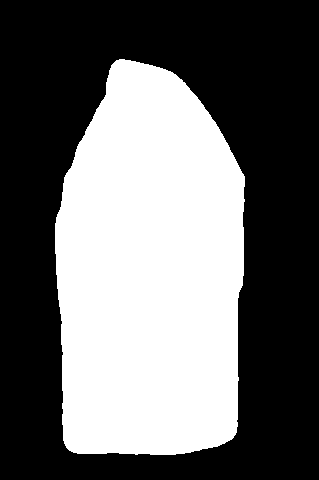

In [97]:
mask = np.zeros(img.shape) # create a single channel 200x200 pixel black image 
cv2.fillPoly(mask, pts=np.int32([snake]), color=(255,255,255))
cv2_imshow(mask)

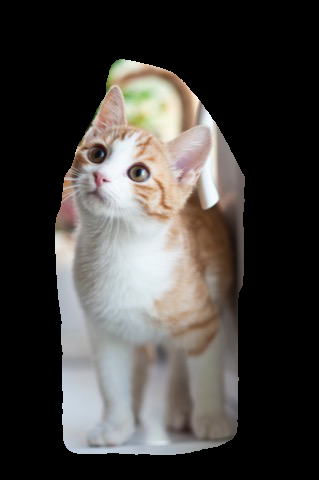

In [98]:
img = images[5].copy()
# mask = np.zeros(img.shape[:2], dtype=np.uint8)

res = cv2.bitwise_and(img, img, mask = mask[:, :, 0].astype(np.uint8))
cv2_imshow(res)